In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
def display_digit(num, x, y, vector = None):
    label = y[num]
    image = x[num]
    if vector is None:
        plt.title('Example: {}  Label: {}'.format(num, label))
        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.title('Real label: {}'.format(label))
        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        plt.subplot(1,2,2)
        thisplot = plt.bar(range(10), vector, color="#777777")
        plt.ylim([0, 1]) 
        plt.xticks([])
        plt.yticks([])
        predicted_label = np.argmax(vector)
        thisplot[predicted_label].set_color('red')
        plt.title('Predicted label: {}'.format(predicted_label))
    plt.show()

In [6]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8913 - val_loss: 0.1601 - val_accuracy: 0.9522
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1963 - accuracy: 0.9405 - val_loss: 0.1141 - val_accuracy: 0.9653
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1551 - accuracy: 0.9530 - val_loss: 0.0980 - val_accuracy: 0.9702
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9596 - val_loss: 0.0862 - val_accuracy: 0.9759
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9622 - val_loss: 0.0796 - val_accuracy: 0.9760
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1135 - accuracy: 0.9647 - val_loss: 0.0832 - val_accuracy: 0.9758
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9665 - val_loss: 0.0769 - val_accuracy:

In [7]:
x_train, y_train = x_train[0:10000:,:], y_train[0:10000]

In [8]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
313/313 [==============================] - 31s 100ms/step - loss: 1.0203 - accuracy: 0.7644 - val_loss: 0.6144 - val_accuracy: 0.8969
Epoch 2/500
313/313 [==============================] - 31s 99ms/step - loss: 0.3770 - accuracy: 0.9141 - val_loss: 0.4789 - val_accuracy: 0.9142
Epoch 3/500
313/313 [==============================] - 31s 99ms/step - loss: 0.2542 - accuracy: 0.9376 - val_loss: 0.3345 - val_accuracy: 0.9253
Epoch 4/500
313/313 [==============================] - 31s 99ms/step - loss: 0.2228 - accuracy: 0.9502 - val_loss: 0.3175 - val_accuracy: 0.9139
Epoch 5/500
313/313 [==============================] - 31s 100ms/step - loss: 0.1715 - accuracy: 0.9587 - val_loss: 0.3519 - val_accuracy: 0.9344
Epoch 6/500
313/313 [==============================] - 31s 100ms/step - loss: 0.1367 - accuracy: 0.9678 - val_loss: 0.2777 - val_accuracy: 0.9441
Epoch 7/500
313/313 [==============================] - 31s 100ms/step - loss: 0.1108 - accuracy: 0.9725 - val_loss: 0.2498 - va

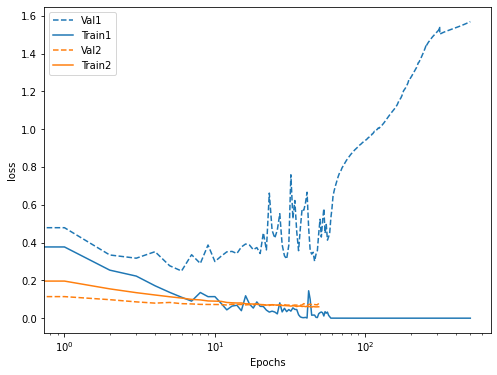

In [10]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel("loss")
val = plt.plot(history1.epoch, history1.history['val_'+'loss'],
                   '--', label='Val1')
plt.plot(history1.epoch, history1.history["loss"], color=val[0].get_color(),
             label='Train1')
val = plt.plot(history2.epoch, history2.history['val_'+'loss'],
                   '--', label='Val2')
plt.plot(history2.epoch, history2.history["loss"], color = val[0].get_color(),
             label='Train2')
plt.legend()
#plt.xlim([0, max(history1.epoch + history2.epoch)])
#plt.ylim([0, 0.5])
plt.xscale("log")
plt.show()